# Exercise 1 
## Question 1

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
import control as ct

#Values
m = 1888.6  
Iz = 25854  
lf = 1.55   
lr = 1.39  
C_a = 20000


In [54]:
def create_matrices(v):
    A = np.array([
        [0, 1, 0, 0],
        [0, -4*C_a/(m*v), 4*C_a/m, -2*C_a*(lf-lr)/(m*v)],
        [0, 0, 0, 1],
        [0, -2*C_a*(lf-lr)/(Iz*v), 2*C_a*(lf-lr)/Iz, -2*C_a*(lf**2+lr**2)/(Iz*v)]
    ])
    B = np.array([
        [0, 0],
        [2*C_a/m, 0],
        [0, 0],
        [2*C_a*lf/Iz, 0]
    ])
    C = np.eye(4)  # Assuming all states are observable
    D = np.zeros((4, 2))
    
    return ct.ss(A, B, C, D)
   

In [62]:
velocities = [2, 5, 8]
print("RESULTS (Q1)")
for v in velocities:
    sys = create_matrices(v)
    p = ct.ctrb(sys.A, sys.B)
    controllability_rank = np.linalg.matrix_rank(p)
    cond1 = controllability_rank == sys.A.shape[0]
    q = ct.obsv(sys.A, sys.C)
    observability_rank = np.linalg.matrix_rank(q)
    cond2 = observability_rank == sys.A.shape[0]
    
    
    print(f"At velocity {v} m/s:")
    print(f"Controllable: {cond1} (rank = {controllability_rank})")
    print(f"Observable: {cond2} (rank = {observability_rank})")
    print(f"Controllability Matrix P: \n {np.array2string(p, precision=3, suppress_small=True)}")
    print(f"Observability Matrix Q: \n {np.array2string(q, precision=3, suppress_small=True)}")
    print()

RESULTS (Q1)
At velocity 2 m/s:
Controllable: True (rank = 4)
Observable: True (rank = 4)
Controllability Matrix P: 
 [[      0.          0.         21.18        0.       -452.643       0.
     9706.503       0.   ]
 [     21.18        0.       -452.643       0.       9706.503       0.
  -206189.084       0.   ]
 [      0.          0.          2.398       0.        -10.663       0.
       92.371       0.   ]
 [      2.398       0.        -10.663       0.         92.371       0.
    -1513.765       0.   ]]
Observability Matrix Q: 
 [[    1.        0.        0.        0.   ]
 [    0.        1.        0.        0.   ]
 [    0.        0.        1.        0.   ]
 [    0.        0.        0.        1.   ]
 [    0.        1.        0.        0.   ]
 [    0.      -21.18     42.359    -1.694]
 [    0.        0.        0.        1.   ]
 [    0.       -0.124     0.248    -3.353]
 [    0.      -21.18     42.359    -1.694]
 [    0.      448.79   -897.58     83.927]
 [    0.       -0.124     0.248  

## Question 2

In [ ]:
def create_matrices(v):
    A = np.array([
        [0, 1, 0, 0],
        [0, -4*C_a/(m*v), 4*C_a/m, -2*C_a*(lf-lr)/(m*v)],
        [0, 0, 0, 1],
        [0, -2*C_a*(lf-lr)/(Iz*v), 2*C_a*(lf-lr)/Iz, -2*C_a*(lf**2+lr**2)/(Iz*v)]
    ])
    B = np.array([
        [0, 0],
        [2*C_a/m, 0],
        [0, 0],
        [2*C_a*lf/Iz, 0]
    ])
    return A, B

def calculate_controllability(A, B):
    C = control.ctrb(A, B)
    return np.linalg.matrix_rank(C)

def analyze_system(v_range):
    log_ratios = []                  
    poles = [[] for _ in range(4)]   #Create list with 4 empty lists
    
    for v in v_range:
        A, B = create_matrices(v)
        
        # Part (a)
        C = control.ctrb(A, B)
        singular_values = np.linalg.svd(C)[1]
        log_ratio = np.log10(singular_values[0] / singular_values[-1])
        log_ratios.append(log_ratio)
        
        # Part (b)
        eigenvalues = np.linalg.eigvals(A)
        for i, pole in enumerate(eigenvalues):
            poles[i].append(pole.real)
    
    return log_ratios, poles


v_range = np.linspace(1, 40, 500)
log_ratios, poles = analyze_system(v_range)


### Part (a)

Text(0, 0.5, 'log10(sigma_1/sigma_n)')

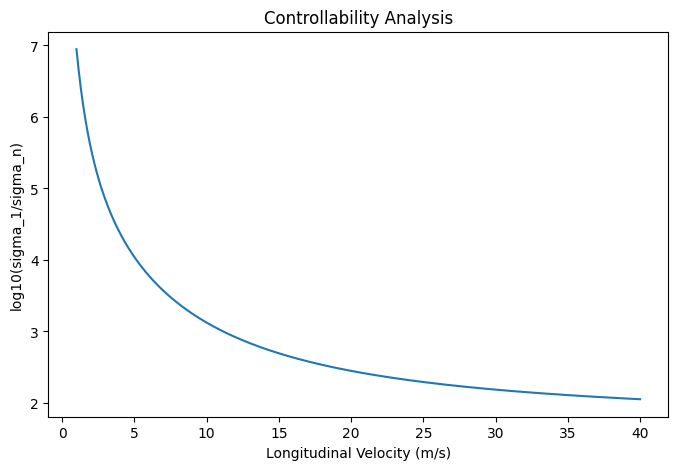

In [ ]:
plt.figure(figsize=(8, 5))
# plt.subplot(3, 2, 1)
plt.plot(v_range, log_ratios)
plt.title('Controllability Analysis')
plt.xlabel('Longitudinal Velocity (m/s)')
plt.ylabel('log10(sigma_1/sigma_n)')



### Part (b)

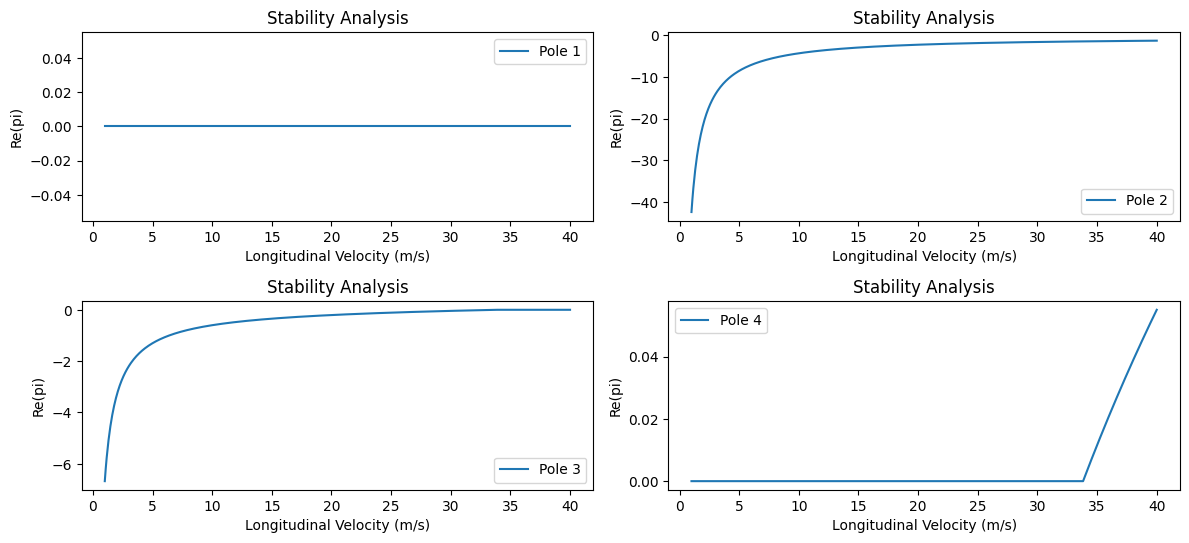

In [ ]:
# Plot real parts of poles
plt.figure(figsize=(12, 8))
for i, pole_set in enumerate(poles):
    plt.subplot(3, 2, 3+i)
    plt.plot(v_range, pole_set, label=f'Pole {i+1}')
    plt.title('Stability Analysis')
    plt.xlabel('Longitudinal Velocity (m/s)')
    plt.ylabel('Re(pi)')
    plt.legend()

plt.tight_layout()
plt.show()

### Conclusions

Controllability Analysis:
- The plot of log10(σ1/σn) versus longitudinal velocity shows a decreasing trend. This indicates that as velocity increases, the system's controllability improves. A lower value of  log10(σ1/σn) suggests better conditioning of the controllability matrix, meaning the system is more controllable at higher velocities.

Stability Analysis:
- Pole 1: This pole remains near zero across all velocities, indicating that it has little effect on the stability. 
- Pole 4: This pole also remains near zero up until around 35 m/s, after which is begins to increase and become positive, indicating instability at speeds greater than 35 m/s.
- Pole 2 and Pole 3: These poles start with negative real parts and move toward zero as velocity increases. This suggests that the system becomes less stable at higher speeds, as poles approaching zero can lead to slower convergence or potential instability.

Overall Conclusions:
- The system becomes more controllable as velocity increases, which is advantageous for control design. While the system is stable at lower velocities (poles have negative real parts), increasing velocity reduces stability margins. Proper control design is needed to ensure stability at higher speeds.
These observations highlight the trade-offs in designing control systems for vehicles operating across a range of speeds. Improved controllability at higher speeds must be balanced against potential reductions in stability.


